# Projet Supervised Learning





Ce projet a pour objectifs:
* La mise en pratique de techniques d’apprentissage supervisé (Bayesien Naïf, KNN, LDA, QDA, Linear SVM, Non Linear SVM, Régression logistique, CART et Random Forest, etc..) pour la classification de données réelles (Binaires et multiclass).

* La comparaison des méthodes de réequilibrage de classes (Oversampling, Undersampling, SMOTE, ADASYN & SMOTEENN)

Ce projet est composé de deux parties:
*  La première traite des données bancaires decrivant les détails financiers et bancaires des clients allemands, et l'objectif est de prédire si un client remboursera un prêt ou un crédit (scénario binaire).
* La deuxième, traite des données relationnelles de publications scientifiques classées en sept classes. L'objectif de cette partie est de prédire la classe d'un document donné en se basant en premier lieu uniquement sur les données vecteur de mot indiquant l'absence ou la présence du mot correspondant dans le dictionnaire (ensemble des mots de toutes les publications), puis en combinant ces données avec le réseau de citations qui indique les relations de citations entre les publications (scénario multiclass).



Les fonctions utilisées dans les deux parties 1 et 2 sont contenues dans le fichier **`utils.py`**

En raison du temps de calcul, les résultats sont sauvegardés dans des fichiers et sont disponible sur Google Drive, dans le dossier `bilans`.



**Bibliographie:**


 [Avoiding leakage in cross-validation when using SMOTE | by Yijie Wang](https://yijiew.medium.com/avoiding-leakage-in-cross-validation-when-using-smote-b63fdd3d159d)

[The right way of using SMOTE with Cross-validation | by KSV Muralidhar | Towards Data Science](https://towardsdatascience.com/the-right-way-of-using-smote-with-cross-validation-92a8d09d00c7)


[StandardScaler vs. MinMaxScaler vs. RobustScaler: Which one to use for your next ML project? | by Sarp Nalcin | Medium](https://medium.com/@onersarpnalcin/standardscaler-vs-minmaxscaler-vs-robustscaler-which-one-to-use-for-your-next-ml-project-ae5b44f571b9)


[Multiclass classification evaluation with ROC Curves and ROC AUC | by Vinícius Trevisan | Towards Data Science](https://towardsdatascience.com/multiclass-classification-evaluation-with-roc-curves-and-roc-auc-294fd4617e3a)


# Partie 1 : Classification binaire.


Cette partie du projet consiste à comparer les différents modèle de classification pour un scénario à deux classes uniquement (binaire). Nous évaluerons la performance de chaque modèle en utilisant différentes métriques et en nous basant sur des données réelles.

Nous avons testé les différents algorithmes de classification sus-cités combinés à diverses méthodes de réequilibrages sur les données non normalisées, puis sur les données normalisées.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# all the imports and the utils functions are in utils.py
from drive.Shareddrives.ProjetSupervisedLearning.utils import *

In [ ]:
# set random seed for reproducibility globally
random_seed = 42
import numpy as np
np.random.seed(random_seed)
import random
random.seed(random_seed)

In [ ]:
names = ['Statut du compte courant existant',
 'Durée en mois',
 'Historique de crédit',
 'Objectif',
 'Montant du crédit',
 "Compte d'épargne",
 'Emploi actuel depuis',
 'Taux de versement en pourcentage du revenu disponible',
 'Statut personnel et sexe',
 'Autres débiteurs',
 'Résidence actuelle depuis',
 'Propriété',
 'Age en années',
 'Autres plans de versement',
 'Logement',
 'Nombre de crédits existants dans cette banque',
 'Travail',
 'Nombre de personnes à charge',
 'Téléphone',
 'Travailleur étranger',
 'Classe']

In [ ]:
# Load dataset (dataset source: https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)
url = '/content/drive/Shareddrives/ProjetSupervisedLearning/data/german.csv'
dataset = read_csv(url, header=None, names=names)

# Exploratory Data Analysis

## Descriptive statistics

In [ ]:
# shape
print(dataset.shape)

(1000, 21)


In [ ]:
# types
from pandas import set_option
set_option('display.max_rows', 500)
print(dataset.dtypes)

Statut du compte courant existant                        object
Durée en mois                                             int64
Historique de crédit                                     object
Objectif                                                 object
Montant du crédit                                         int64
Compte d'épargne                                         object
Emploi actuel depuis                                     object
Taux de versement en pourcentage du revenu disponible     int64
Statut personnel et sexe                                 object
Autres débiteurs                                         object
Résidence actuelle depuis                                 int64
Propriété                                                object
Age en années                                             int64
Autres plans de versement                                object
Logement                                                 object
Nombre de crédits existants dans cette b

In [ ]:
# descriptions, change precision to 3 places
set_option('display.precision', 3)
print(dataset.describe())

       Durée en mois  Montant du crédit  \
count       1000.000           1000.000   
mean          20.903           3271.258   
std           12.059           2822.737   
min            4.000            250.000   
25%           12.000           1365.500   
50%           18.000           2319.500   
75%           24.000           3972.250   
max           72.000          18424.000   

       Taux de versement en pourcentage du revenu disponible  \
count                                           1000.000       
mean                                               2.973       
std                                                1.119       
min                                                1.000       
25%                                                2.000       
50%                                                3.000       
75%                                                4.000       
max                                                4.000       

       Résidence actuelle depuis  A

In [ ]:
# class distribution
print(dataset.groupby("Classe").size())

Classe
1    700
2    300
dtype: int64


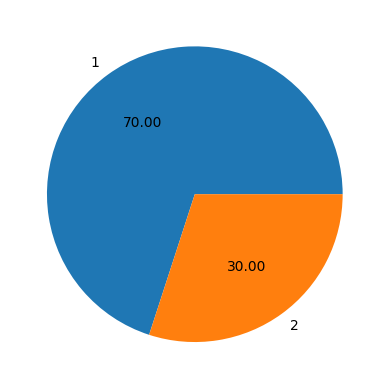

In [ ]:
# plot pie chart for the Class variable
dataset.groupby('Classe').size().plot(kind='pie', autopct='%.2f')
pyplot.show()

# Data visualizations

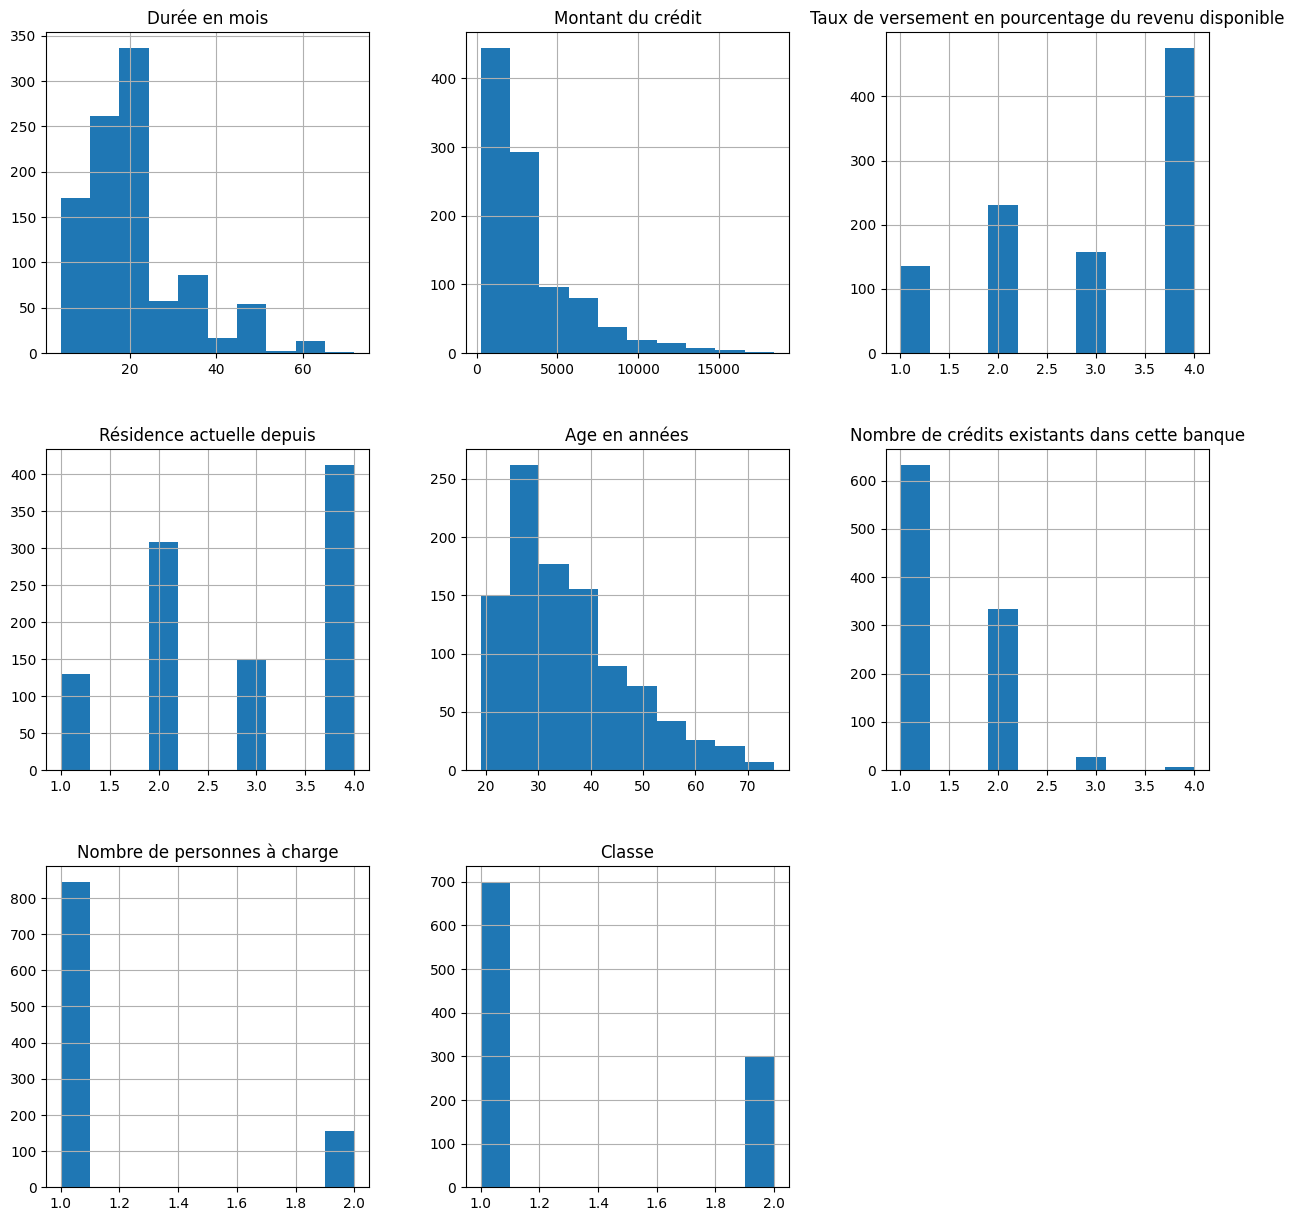

In [ ]:
# histograms
dataset.hist(figsize=(15,15))
pyplot.show()

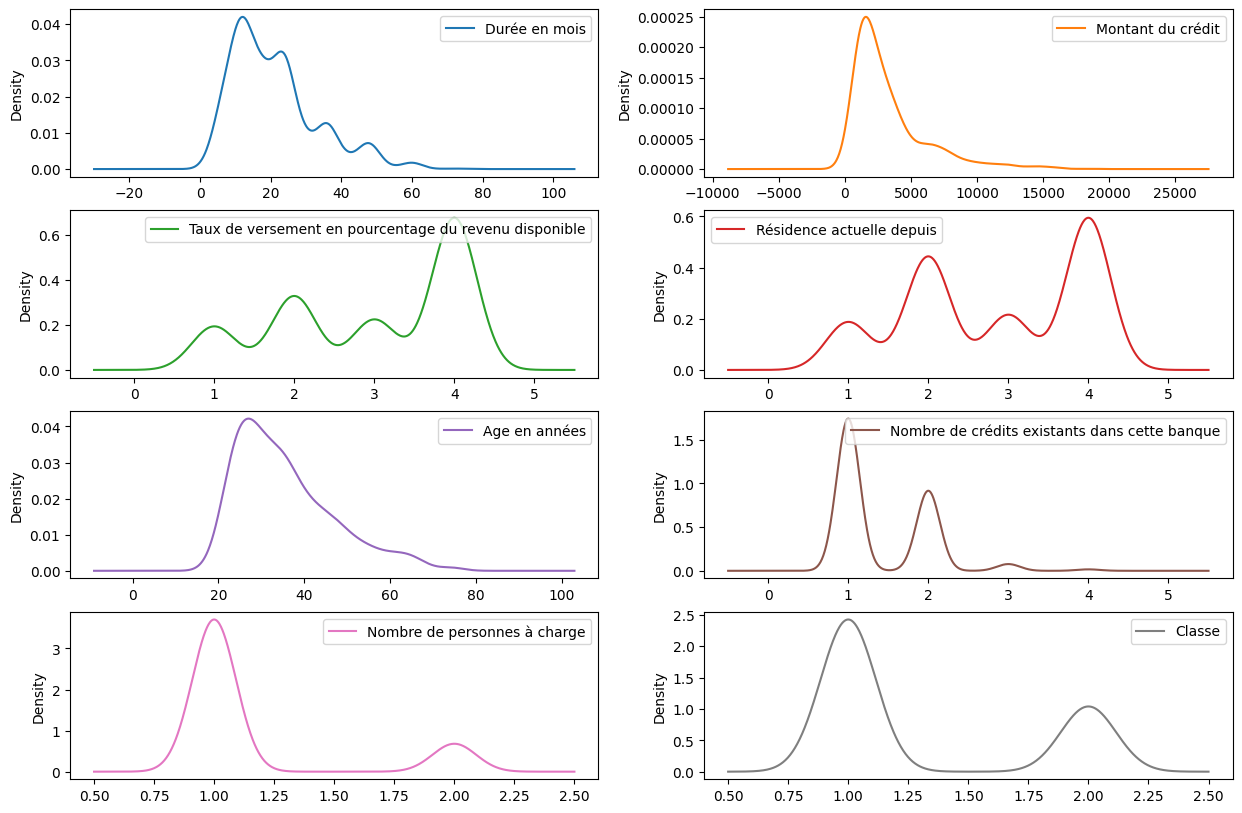

In [ ]:
# density
dataset.plot(kind='density', subplots=True, layout=(4, 2), sharex=False, legend=True, figsize=(15,10))
pyplot.show()

1. Durée en mois : La plupart des crédits sont concentrés autour de 10-20 mois, avec une diminution progressive jusqu'à 60 mois. Il y a très peu de crédits qui dépassent cette durée.

2. Montant du crédit : La majorité des crédits sont inférieurs à 5 000 unités monétaires, avec une diminution nette des crédits à mesure que le montant augmente.

3. Taux de versement en pourcentage du revenu disponible : Il y a une concentration élevée de clients qui consacrent environ 4% de leur revenu disponible aux versements, suivi d'une distribution normale entre 1 et 3%.

4. Résidence actuelle depuis : La plupart des clients ont une résidence actuelle de 4 ans, avec une distribution assez uniforme entre 1 à 3 ans.

5. Âge en années : La distribution montre un pic pour les clients âgés de 25 à 35 ans, avec une tendance décroissante après 35 ans.

6. Nombre de crédits existants dans cette banque : Une grande majorité des clients n'ont qu'un seul crédit dans cette banque. Le nombre de clients ayant deux crédits ou plus est considérablement plus bas.

7. Nombre de personnes à charge : La plupart des clients n'ont pas de personnes à charge ou seulement une. Le nombre diminue pour deux personnes à charge et plus.

8. Classe : Il y a deux classes distinctes, avec une prédominance de la classe 1 sur la classe 2.



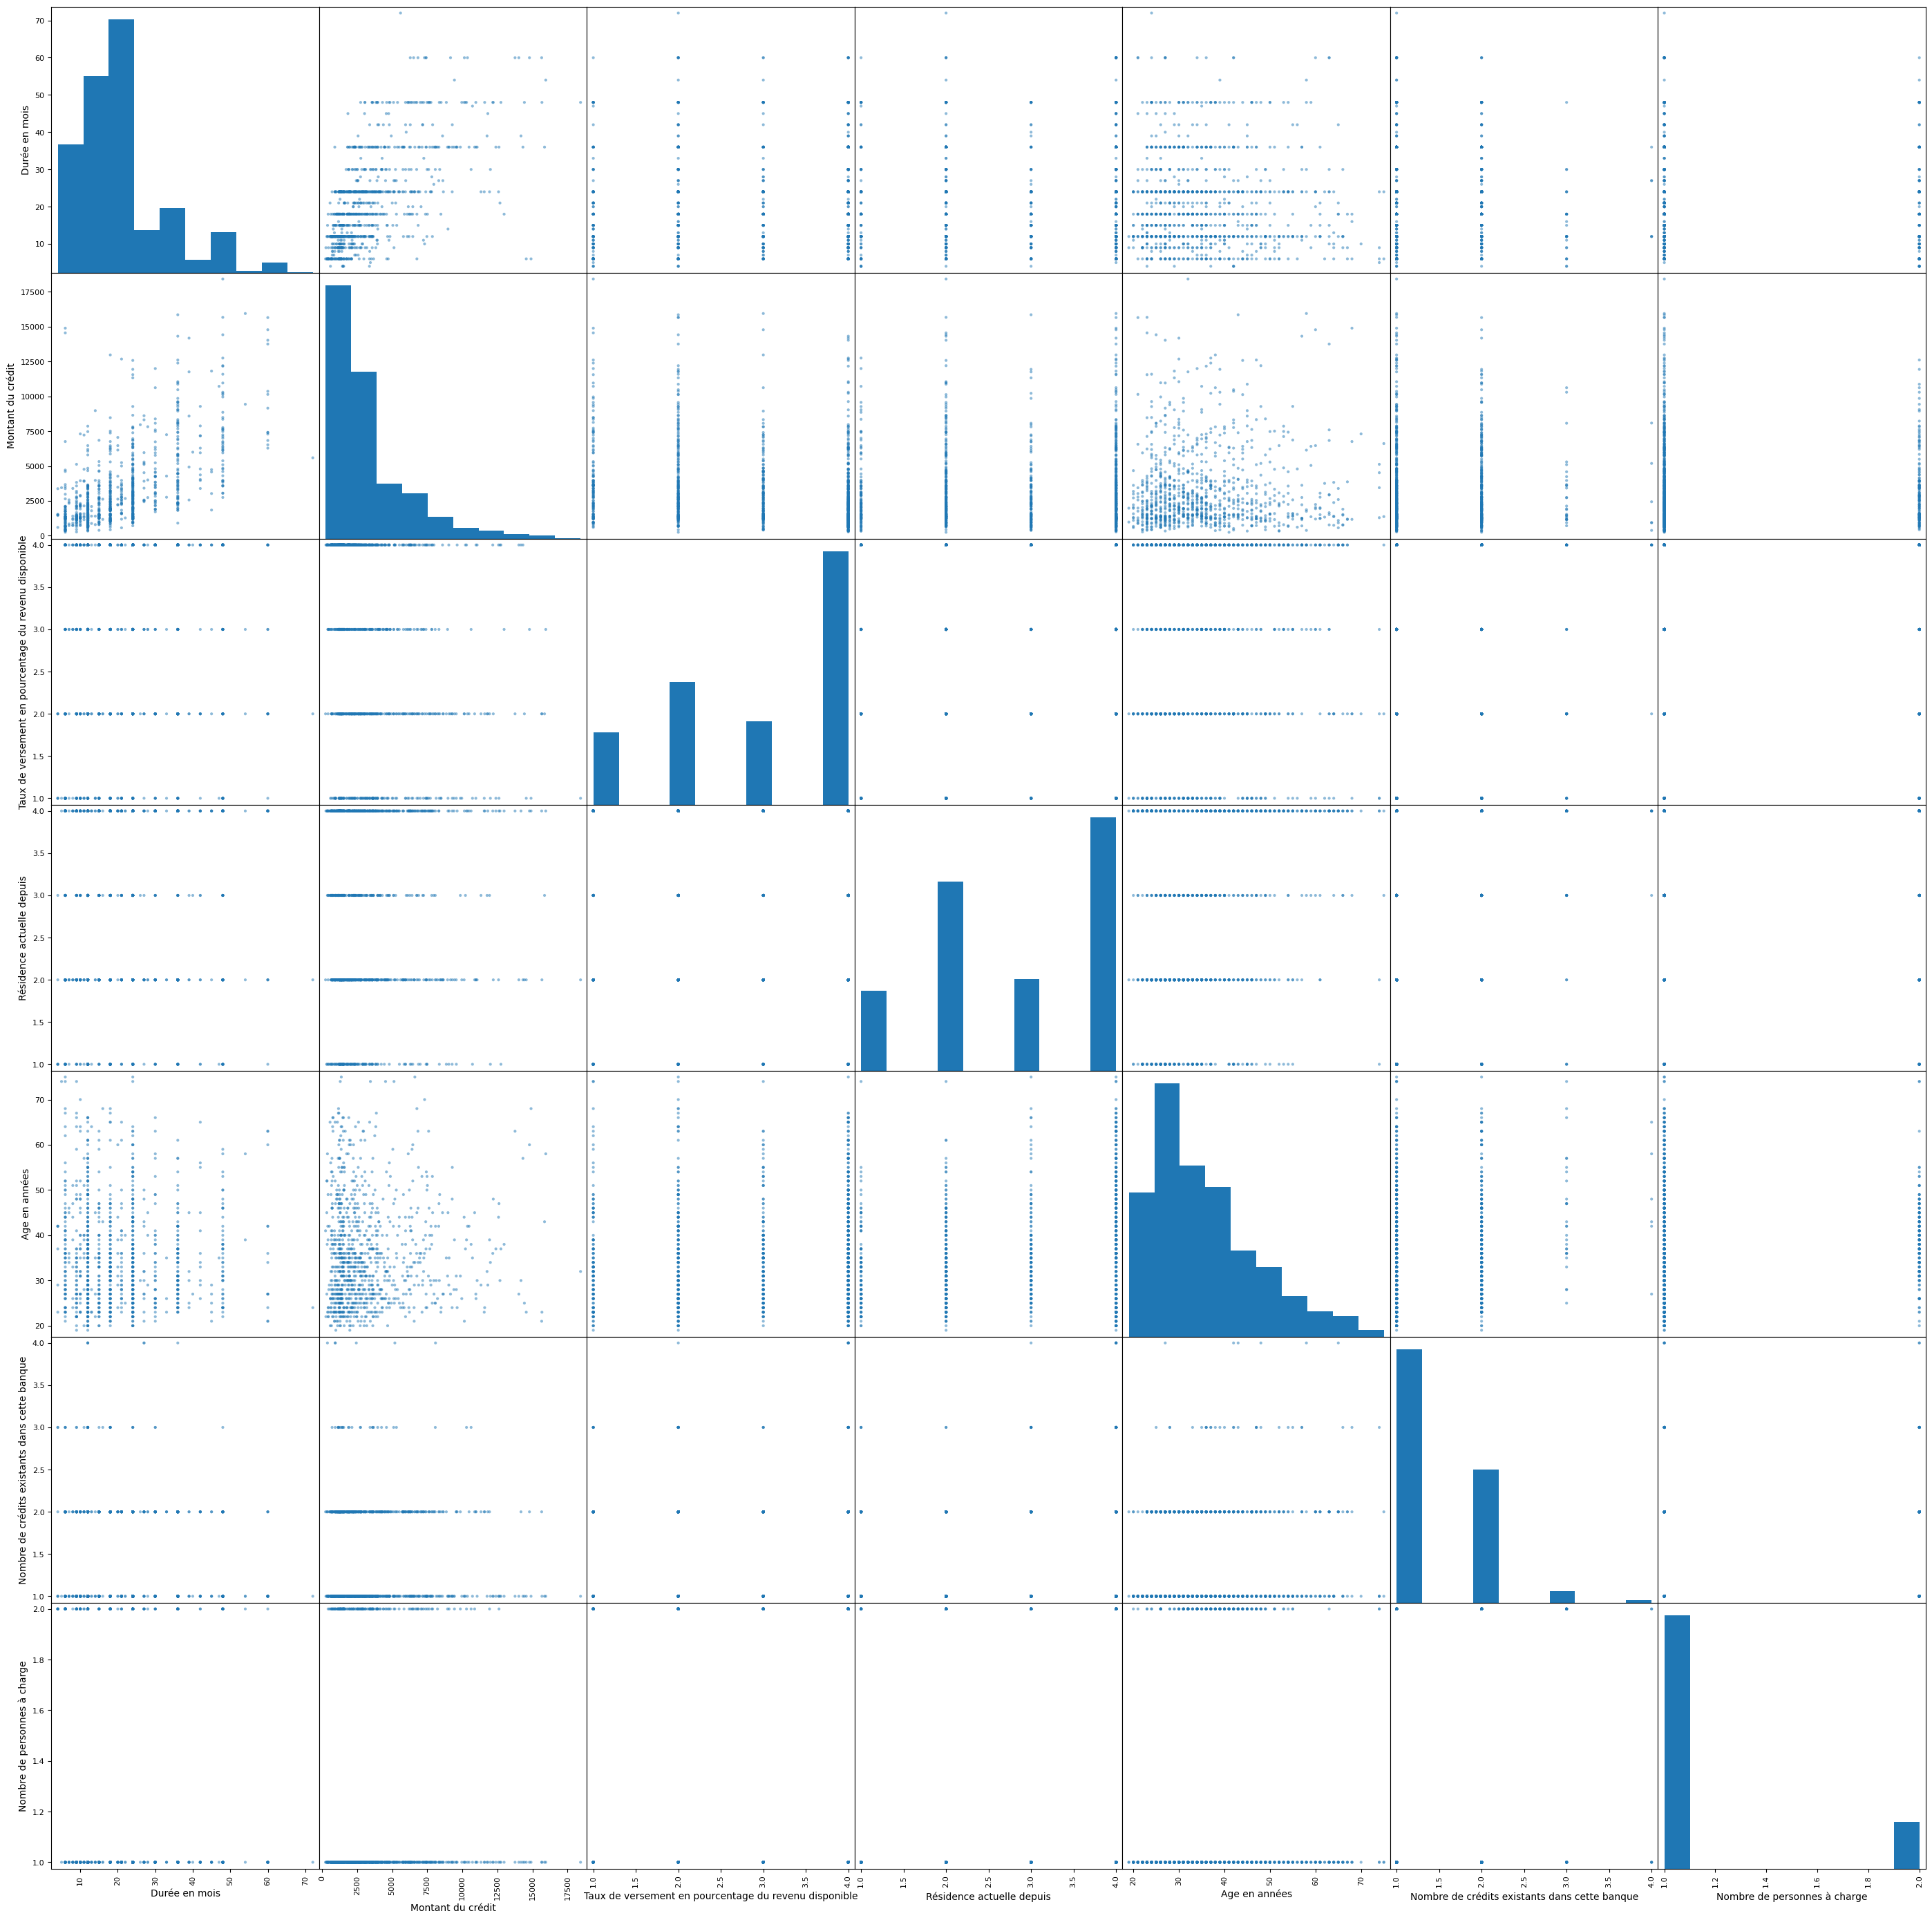

In [ ]:
# scatter plot matrix
scatter_matrix(dataset.drop('Classe', axis=1), figsize=(35, 35))
pyplot.show()


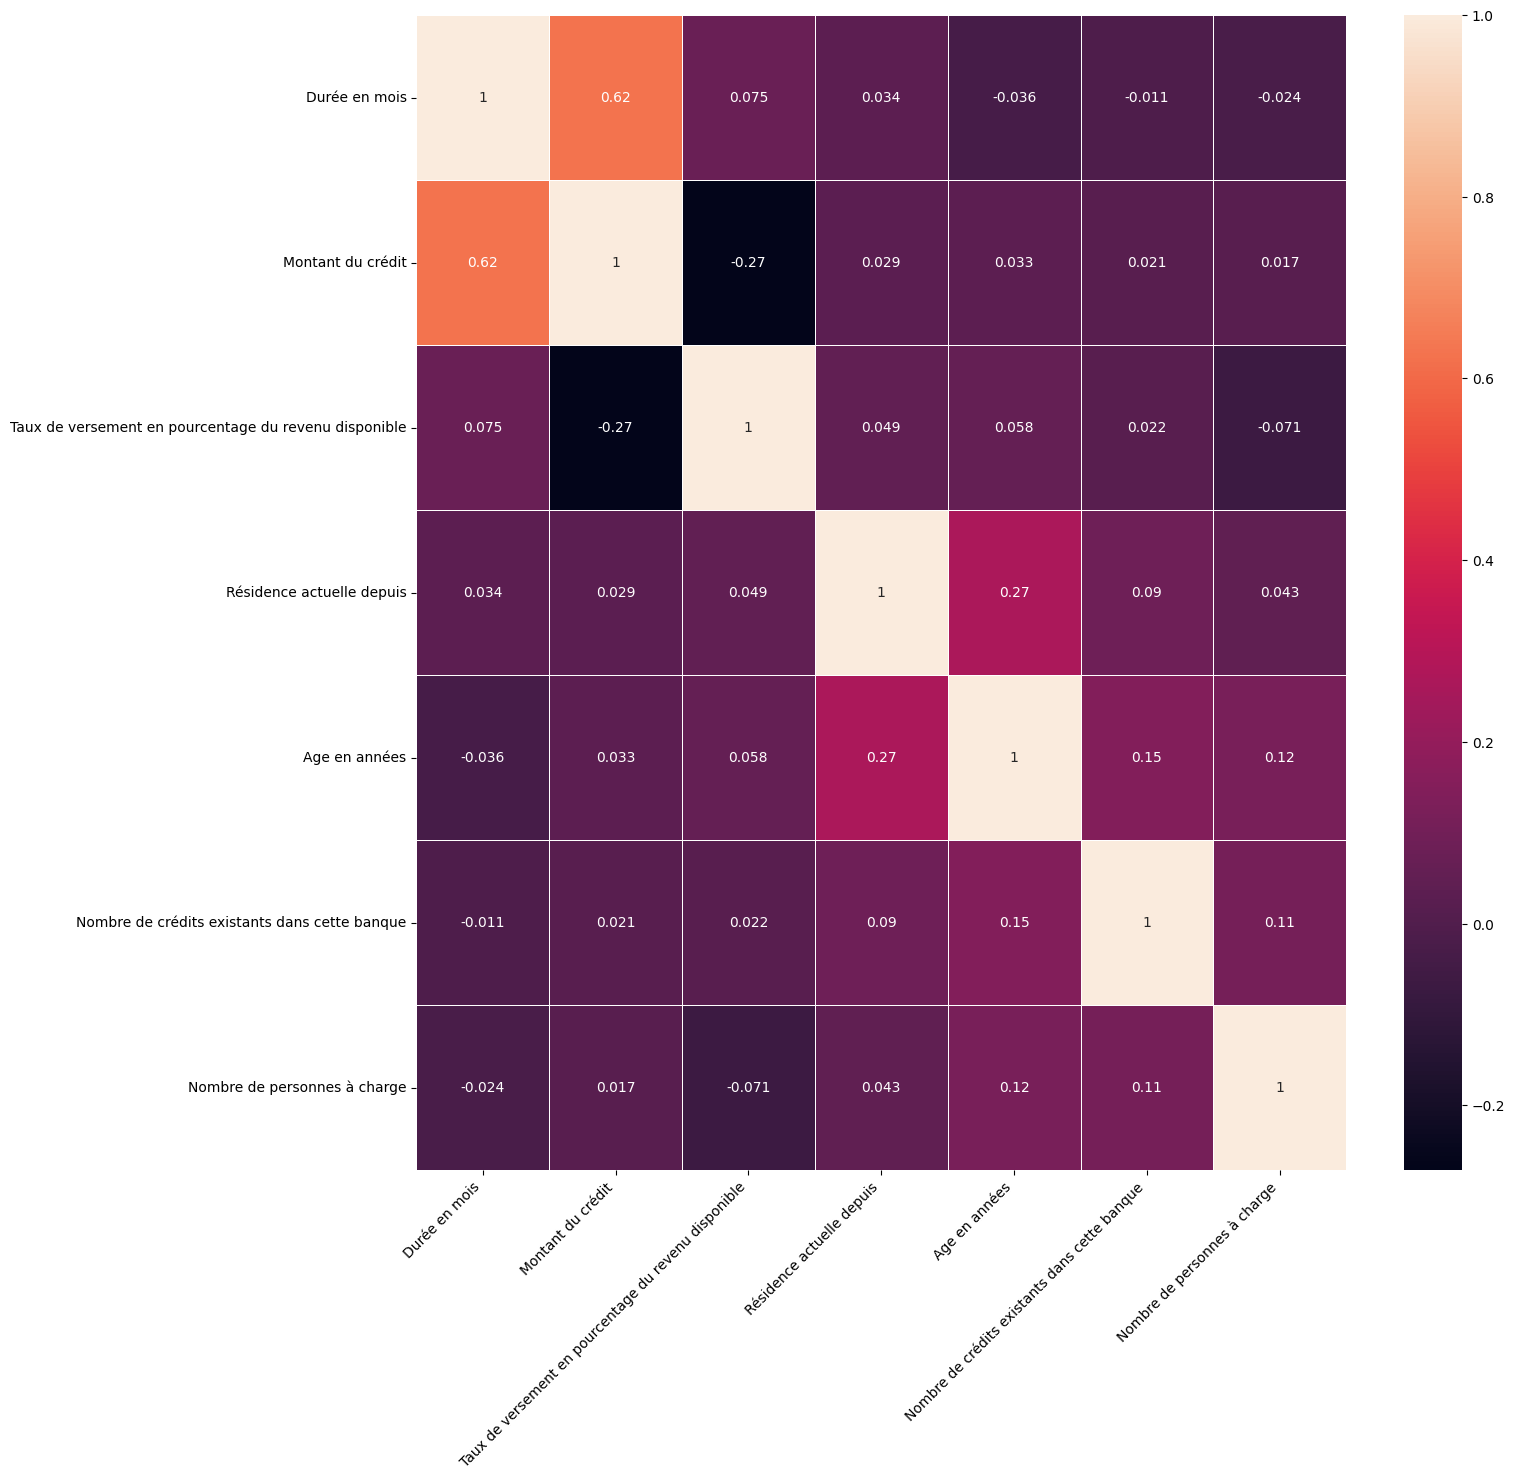

In [ ]:
import seaborn as sns
# plot correlation matrix
numerical_vars = dataset.drop('Classe', axis=1).select_dtypes(include=[np.number]).columns # les données catégorielles
corr = dataset[numerical_vars].corr()
fig, ax = pyplot.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
pyplot.show()

1. Durée en mois vs. Montant du crédit (0.62) : Il y a une corrélation positive modérée entre la durée du crédit en mois et le montant du crédit. Cela signifie que, en général, les crédits d'une durée plus longue sont associés à des montants plus élevés.

2. Montant du crédit vs. Taux de versement en pourcentage du revenu disponible (-0.27) :
Il y a une corrélation négative modérée entre le montant du crédit et le taux de versement en pourcentage du revenu disponible. Cela suggère que des montants de crédit plus élevés sont associés à des taux de versement plus bas en pourcentage du revenu disponible.


Il est important de noter que ces corrélations ne signifient pas nécessairement une relation de causalité entre les variables. Une corrélation élevée entre deux variables peut simplement indiquer une association

# Prepare Data

## Categorical variables encoding

In [ ]:
import numpy as np
dataset.select_dtypes(exclude=[np.number]).columns # les données catégorielles

Index(['Statut du compte courant existant', 'Historique de crédit', 'Objectif',
       'Compte d'épargne', 'Emploi actuel depuis', 'Statut personnel et sexe',
       'Autres débiteurs', 'Propriété', 'Autres plans de versement',
       'Logement', 'Travail', 'Téléphone', 'Travailleur étranger'],
      dtype='object')

In [ ]:
# Label encoding des données catégorielles (ordinales)

dataset["Statut du compte courant existant"].replace({"A11": 0, "A12": 1, "A13": 2, "A14": 3}, inplace=True)
dataset["Historique de crédit"].replace({"A30": 0, "A31": 1, "A32": 2, "A33": 3, "A34": 4}, inplace=True)
# dataset["Objectif"].replace({"A40": 0, "A41": 1, "A42": "2", "A43": 3, "A44": 4, "A45": "5", "A46": "6", "A47": "7", "A48": "8", "A49": "9", "A410": "10"}, inplace=True)
dataset["Compte d'épargne"].replace({"A61": 0, "A62": 1, "A63": 2, "A64": 3, "A65": 4}, inplace=True)
dataset["Emploi actuel depuis"].replace({"A71": 0, "A72": 1, "A73": 2, "A74": 3, "A75": 4}, inplace=True)
# dataset["Statut personnel et sexe"].replace({"A91": 0, "A92": 1, "A93": "2", "A94": 3, "A95": 4}, inplace=True)
dataset["Autres débiteurs"].replace({"A101": 0, "A102": 1, "A103": 2}, inplace=True)
# dataset["Propriété"].replace({"A121": 0, "A122": 1, "A123": "2", "A124": 3}, inplace=True)
# dataset["Autres plans de versement"].replace({"A141": 0, "A142": 1, "A143": "2"}, inplace=True)
# dataset["Logement"].replace({"A151": 0, "A152": 1, "A153": "2"}, inplace=True)
dataset["Travail"].replace({"A171": 0, "A172": 1, "A173": 2, "A174": 3}, inplace=True)
dataset["Téléphone"].replace({"A191": 0, "A192": 1}, inplace=True)
dataset["Travailleur étranger"].replace({"A201": 1, "A202": 0}, inplace=True)

In [ ]:
# One-hot encoding des données catégorielles (nominales)

dataset["Objectif"].replace({"A40": "Voiture (nouvelle)", "A41": "Voiture (d'occasion)", "A42": "Meubles/Equipement", "A43": "Radio/TV", "A44": "Appareils électroménagers", "A45": "Réparations", "A46": "Education", "A47": "Vacances", "A48": "Reconversion", "A49": "Affaires", "A410": "Autres"}, inplace=True)
dataset["Statut personnel et sexe"].replace({"A91": "Homme divorcé/séparé", "A92": "Femme divorcée/séparée/mariée", "A93": "Homme célibataire", "A94": "Homme marié/veuf", "A95": "Femme célibataire"}, inplace=True)
dataset["Propriété"].replace({"A121": "Immobilier", "A122": "Bâtiment/terrain", "A123": "Loyer", "A124": "Sans propriété"}, inplace=True)
dataset["Autres plans de versement"].replace({"A141": "Banque", "A142": "Magasin", "A143": "Sans"}, inplace=True)
dataset["Logement"].replace({"A151": "Location", "A152": "Propriétaire", "A153": "Logé gratuitement"}, inplace=True)

dataset = pd.get_dummies(dataset, drop_first=True, columns=[ # drop_first=True pour éviter la multi-colinéarité
 'Objectif',
 'Statut personnel et sexe',
 'Propriété',
 'Autres plans de versement',
 'Logement'])

In [ ]:
dataset.shape

(1000, 35)

L'encodage des données a généré 15 nouvelles colonnes (ce qui fait un total de 35 colonnes)

Les colonnes d'origine ont été supprimées.

## Handle imbalanced data

Les classes sont déséquilibrées, avec 70% des clients appartenant à la classe 1 et 30% à la classe 2.

Les méthodes disponibles pour équilibrer les classes sont les suivantes :

1. Sous-échantillonnage de la classe majoritaire : supprimer des échantillons de la classe majoritaire. Cela peut être problématique car des informations sont perdues.

2. Sur-échantillonnage de la classe minoritaire : soit en dupliquant des échantillons de la classe minoritaire, ou en en générant de nouvelles données synthétiques, cette méthode peut être implémentée à l'aide de techniques telles que SMOTE (Synthetic Minority Over-sampling Technique) et ADASYN (Adaptive Synthetic Sampling).
3. Combinaison du sous-échantillonnage et du sur-échantillonnage :  en utilisant des techniques comme SMOTE-ENN (SMOTE with Edited Nearest Neighbors).





In [ ]:
X = dataset.drop('Classe', axis=1).values
Y = dataset['Classe'].values
Y -= 1 # 1 mauvais, 0 bon

In [ ]:
# define imblearn methods to use
imblearn_methods = {
    'Imbalanced': None,
    'Undersampled': RandomUnderSampler,
    'Oversampled': RandomOverSampler,
    'SMOTE': SMOTE,
    'ADASYN': ADASYN,
    'SMOTEENN': SMOTEENN
}

## Split data into train and test sets

In [ ]:
# split dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y) # stratify pour avoir la même proportion de classes dans le train et le test

# Evaluate Algorithms

**L'accent devrait être mis sur la capacité du modèle à identifier correctement les mauvais clients (recall élevé), tout en maintenant une précision raisonnable pour éviter de fausses alertes.**

In [7]:
# compare the algorithms without scaling
results_dict_without_scaling = {key: cross_validation(create_models(balance_method=value), X, Y) for key, value in imblearn_methods.items()}
summary_without_scaling = summarize_results(results_dict_without_scaling)
summary_without_scaling.to_csv('summary_without_scaling.csv', index=False)
summary_without_scaling


,Model,Dataset,Accuracy,F1,Precision,Recall,AUC
0,NB,SMOTEENN,0.714,0.547198,0.519975,0.586667,0.749000
1,NB,Imbalanced,0.704,0.536153,0.507622,0.573333,0.734381
2,NB,Oversampled,0.699,0.530193,0.504533,0.570000,0.738619
3,NB,ADASYN,0.697,0.527432,0.496280,0.566667,0.740619
4,NB,Undersampled,0.700,0.528736,0.504946,0.560000,0.737810
...,...,...,...,...,...,...,...
61,SVM,Oversampled,0.711,0.125754,0.671667,0.070000,0.565286
62,SVM,Imbalanced,0.711,0.120965,0.723333,0.066667,0.550714
63,SVM,Undersampled,0.709,0.120238,0.666667,0.066667,0.563190
64,SVM,SMOTE,0.710,0.116192,0.600714,0.066667,0.548238


* Ces résultats suggèrent que le modèle Naive Bayes avec la technique d'échantillonnage SMOTEENN a une capacité décente à identifier les exemples positifs.

*   Le modèle CART avec SMOTEENN montre un équilibre entre recall et précision, avec un F1-score relativement élevé.
*   Le modèle XGBoost avec l'échantillonnage oversampled présente une bonne précision tout en maintenant un recall raisonnable.
*   Le modèle KNN avec les différentes méthodes d'équilibrage et le SVM avec SMOTEENN montrent une très faible capacité à détecter les exemples positifs (recall très faible).

**Il est à noter que les données n'ont pas été normalisées, ce qui pourrait influencer la performance des modèles.**




In [8]:
# compare the algorithms with scaling
results_dict_with_scaling = {key: cross_validation(create_std_scaled_models(balance_method=value), X, Y) for key, value in imblearn_methods.items()}
summary_with_scaling = summarize_results(results_dict_with_scaling)
summary_with_scaling.to_csv('summary_with_scaling.csv', index=False)
summary_with_scaling


,Model,Dataset,Accuracy,F1,Precision,Recall,AUC
0,NB,ADASYN,0.703,0.534821,0.504591,0.573333,0.738619
1,NB,SMOTEENN,0.705,0.537294,0.510890,0.570000,0.743762
2,NB,Oversampled,0.703,0.534504,0.510403,0.566667,0.736762
3,NB,SMOTE,0.700,0.527146,0.497869,0.566667,0.737476
4,NB,Imbalanced,0.699,0.528817,0.505219,0.563333,0.739714
...,...,...,...,...,...,...,...
61,SVM,Undersampled,0.707,0.113357,0.616667,0.063333,0.567762
62,SVM,SMOTEENN,0.706,0.107164,0.663095,0.060000,0.560476
63,SVM,ADASYN,0.706,0.107730,0.573333,0.060000,0.567429
64,SVM,Imbalanced,0.708,0.101724,0.596667,0.056667,0.550429


**En général, la normalisation des données semble améliorer les performances de certains modèles, mais des disparités persistent en fonction des techniques d'échantillonnage.**

* ADASYN et SMOTEENN montrent une amélioration du recall par rapport à d'autres méthodes avec l'algorithme NB.

*   Performances globalement élevées avec XGBoost, les données déséquilibrées et le sous-échantillonnage montrent des résultats équilibrés entre précision et recall.

*  Le modèle KNN semble avoir du mal à détecter les exemples positifs.

## Grid search

In [ ]:
# Tune the scaled models (with GridSearchCV), include the default parameters in the grid

# Standardize the dataset
params = {
    'LR': {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg', 'sag']
    },
    'LDA': {
        'solver': ['svd', 'lsqr', 'eigen']
    },
    'KNN': {
        'n_neighbors': [i for i in range(1, 21)],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
    },
    'CART': {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [None] + [i for i in range(1, 21)],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'NB': {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    },
    'SVM': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto'],
        'shrinking': [True, False]
    },
    'XGB': {
        'n_estimators': [50, 100, 150, 200, 250, 300],
        'max_depth': [2, 4, 6, 8, 10, None],
        'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
        'booster': ['gbtree', 'gblinear', 'dart']
    },
    'AB': {
        'n_estimators': [50, 100, 150, 200, 250, 300],
        'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
        'algorithm': ['SAMME', 'SAMME.R']
    },
    'GBM': {
        'n_estimators': [50, 100, 150, 200, 250, 300],
        'max_depth': [2, 4, 6, 8, 10, None],
        'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
    },
    'RF': {
        'n_estimators': [50, 100, 150, 200, 250, 300],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'ET': {
        'n_estimators': [50, 100, 150, 200, 250, 300],
        'max_depth': [2, 4, 6, 8, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False],
        'max_features': ['auto', 'sqrt', 'log2']
    }
}

In [9]:
import time

results_grid_search_lists = []

for dataset_name, imblearn_method in imblearn_methods.items():
    print(dataset_name)
    models = create_std_scaled_models(balance_method=imblearn_method)
    for name, model in models:
        # try:
        start = time.time()
        print(name)
        best_estimator = grid_search(model, params[name], X_train, Y_train)
        acc, f1, precision, recall, auc = evaluate(best_estimator, X_test, Y_test)
        results_grid_search_lists.append((name, dataset_name, acc, f1, precision, recall, auc))
        end = time.time()
        print("Time: %f" % (end - start))
        print("-------------------------------------------")
        # except Exception as e:
        #     with open('errors.txt', 'a') as f:
        #         f.write(name + '\n')
        #         f.write(str(e) + '\n')
        #     print("-------------------------------------------")

# convert results_grid_search_lists to a dataframe
results_grid_search_lists = pd.DataFrame(results_grid_search_lists, columns=['Model', 'Dataset', 'Accuracy', 'F1', 'Precision', 'Recall', 'AUC'])
results_grid_search_lists.sort_values(by=['Accuracy', 'F1', 'Precision', 'Recall', 'AUC'], ascending=False, inplace=True, ignore_index=True)

# save the results in a csv file
results_grid_search_lists.to_csv('results_grid_search_lists.csv', index=False)


,Model,Dataset,Accuracy,F1,Precision,Recall,AUC
0,LR,SMOTEENN,0.590,0.568421,0.415385,0.900000,0.792143
1,SVM,SMOTEENN,0.600,0.569892,0.420635,0.883333,0.794524
2,LDA,SMOTEENN,0.650,0.597701,0.456140,0.866667,0.769762
3,KNN,SMOTEENN,0.605,0.568306,0.422764,0.866667,0.763571
4,SVM,SMOTE,0.760,0.680000,0.566667,0.850000,0.813214
...,...,...,...,...,...,...,...
61,RF,Imbalanced,0.785,0.527473,0.774194,0.400000,0.806786
62,LR,Imbalanced,0.760,0.478261,0.687500,0.366667,0.809881
63,ET,Imbalanced,0.765,0.459770,0.740741,0.333333,0.799405
64,KNN,Imbalanced,0.745,0.370370,0.714286,0.250000,0.810119


**Déséquilibre de classe :**
* Les modèles semblent avoir des difficultés à détecter les exemples positifs lorsque les données sont désiquilibrées, comme en témoignent les recalls relativement bas dans de nombreux cas.
*  Les techniques d'échantillonnage, telles que SMOTEENN, ADASYN, Oversampling et Undersampling, affectent différemment les performances des modèles. Par exemple, le recall semble souvent amélioré avec SMOTEENN, tandis qu'il peut être plus variable avec d'autres méthodes.

**Performance du modèle :**
* XGBoost (XGB) : Généralement performant avec des recalls équilibrés, mais des performances variables en fonction des techniques d'échantillonnage.
* Random Forest (RF) et Extra Trees (ET) : Souvent associés à de bonnes performances, mais des déséquilibres dans le recall, en particulier avec Oversampling.
* Régression logistique (LR) et Linear Discriminant Analysis (LDA) : Des performances stables avec quelques variations en fonction des techniques d'échantillonnage.
* Support Vector Machine (SVM) : Des résultats variables, mais souvent avec un recall plus faible, même après l'échantillonnage.

**Impact du déséquilibre sur la sélection du modèle :**

Certains modèles semblent plus sensibles au déséquilibre de classe, ce qui peut être observé par des fluctuations significatives dans le recall. Le choix du modèle doit donc être basé sur la manière dont il gère le déséquilibre tout en maintenant des performances globales.

> En résumé, le déséquilibre de classe a un impact significatif sur le rappel des modèles, et l'efficacité des techniques d'échantillonnage peut varier d'un modèle à l'autre.




